# Predicting Heart Disease using Machine Learning

This notebook researches into using various Python-based Maching Learning (ML) and Data Science libraries in an attempt to build a maching learning capable of predicting whether or not someone has heart disease based on their medical attributes.

The following approach is taken:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

Statement:
> Given clinical parameters about a patient, is it possible to predict whether or not a patient has heart disease?

## 2. Data

The original data came from the Cleveland data from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Heart+Disease). 

There is also a version of it available on Kaggle (https://www.kaggle.com/ronitf/heart-disease-uci). 

## 3. Evaluation

Goal:
> If the model reaches 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, continue to pursue the project.

## 4. Features

Different information about each of the features of the data is listed below.

**Create a data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical Angina: chest pain related decrease blood sypply to the heart
    * 1: Atypical Angina: chest pain not related to the heart
    * 2: Non-Anginal Pain: typically esophageal spasms (non-heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anyting above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + 0.2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
    * '> 126' mg/dL signals diabeters
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber    
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
    * look at stress of heart during exercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with exercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2. Downsloping: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal: thalium stress result
    * 1,3 = normal
    * 6 = fixed defect
    * 7 = reversable defect: no proper blood movement when excercising
14. target - have disease or not (1 = yes, 0 = no) (the predicted attribute)

**Note:** No personal identifiable information (PPI) can be found in the dataset. 

## Preparing the tools

Utilize pandas, matplotlib and NumPy for data analysis and manipulation.

In [3]:
# Import relevant libraries

# Regular Exploratory Data Analysis (EDA) and Plotting Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# allows the plots to appear inside the notebook
%matplotlib inline     

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load Data

In [4]:
df = pd.read_csv('_Data/heart_disease.csv')
df.shape             # (rows, columns)

(303, 14)

## Data Exploration (Exploratory Data Analysis (EDA))

The goal is to find out more about the data and become a subject matter expert on the working dataset.

1. What question(s) need to be solved?
2. What kind of data and how to treat different types?
3. What is missing from the data and how do you deal with it?
4. Where are the outliers and why it may be important or not?
5. How to add, change or remove features to get more out of the data?

In [6]:
df.head()       # Review the first 5 rows of dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.tail()       # Review the last 5 rows of the dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [9]:
# Determine how many types of classes within the dataset
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

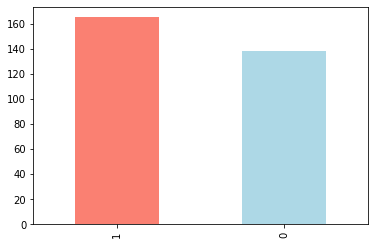

In [11]:
# Plot the types of classes within the dataset
df['target'].value_counts().plot(kind = 'bar', color = ['salmon', 'lightblue']);

In [12]:
df.info()        # Review the type of data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
# Review if there are any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [15]:
df.describe()     # Returns some statistical info of the dataset column by column

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency According to Sex

In [18]:
df.sex.value_counts()      # or df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [17]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


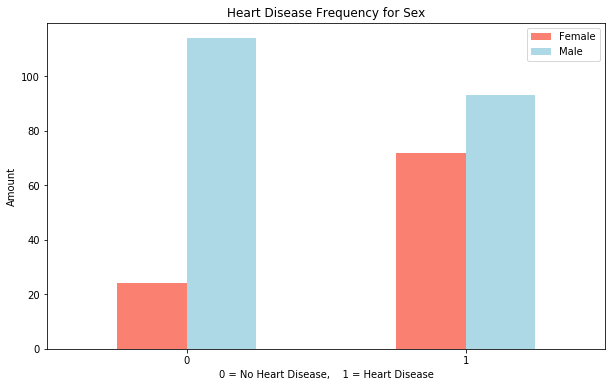

In [75]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind = 'bar',
                                   figsize = (10, 6),
                                    color = ['salmon', 'lightblue'])

plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0 = No Heart Disease,    1 = Heart Disease')
plt.ylabel('Amount')
plt.legend(['Female', 'Male'])
plt.xticks(rotation = 0);

### Heart Disease Frequency According to Chest Pain Type

**cp - chest pain type**
* 0: Typical Angina: chest pain related decrease blood sypply to the heart
* 1: Atypical Angina: chest pain not related to the heart
* 2: Non-Anginal Pain: typically esophageal spasms (non-heart related)
* 3: Asymptomatic: chest pain not showing signs of disease

In [72]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


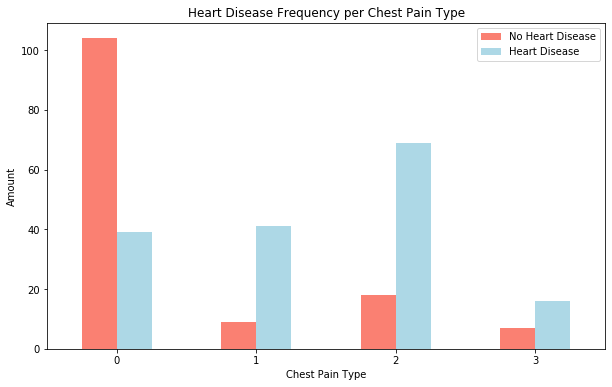

In [74]:
# Create a plot of crosstab between target and chest pain type
pd.crosstab(df.cp, df.target).plot(kind = 'bar',                    
                                   figsize = (10, 6),
                                   color = ['salmon', 'lightblue'])
                                    
plt.title('Heart Disease Frequency per Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.xticks(rotation = 0);

### Age vs. Maximum Heart Rate Achieved for Heart Disease

In [56]:
df.thalach.value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

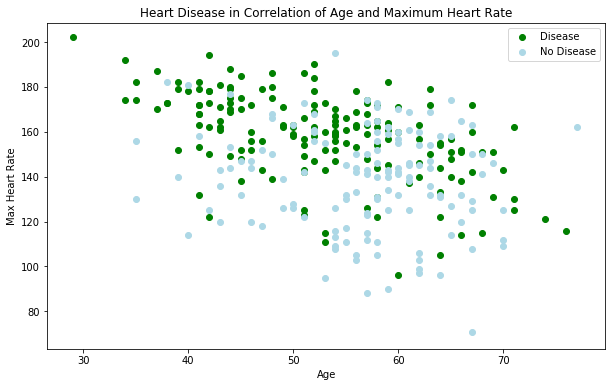

In [68]:
# Create another figure
plt.figure(figsize = (10,6))

# Scatter Plot with Positive Examples
plt.scatter(df.age[df.target == 1],
            df.thalach[df.target == 1],
            c = 'green');

# Scatter Ploit with Negative Examples
plt.scatter(df.age[df.target == 0],
            df.thalach[df.target == 0],
            c = 'lightblue');

# Add some lables
plt.title('Heart Disease in Correlation of Age and Maximum Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No Disease']);

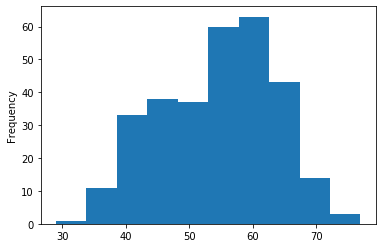

In [70]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

In [76]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [79]:
# Make a Correlation Matrix
corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


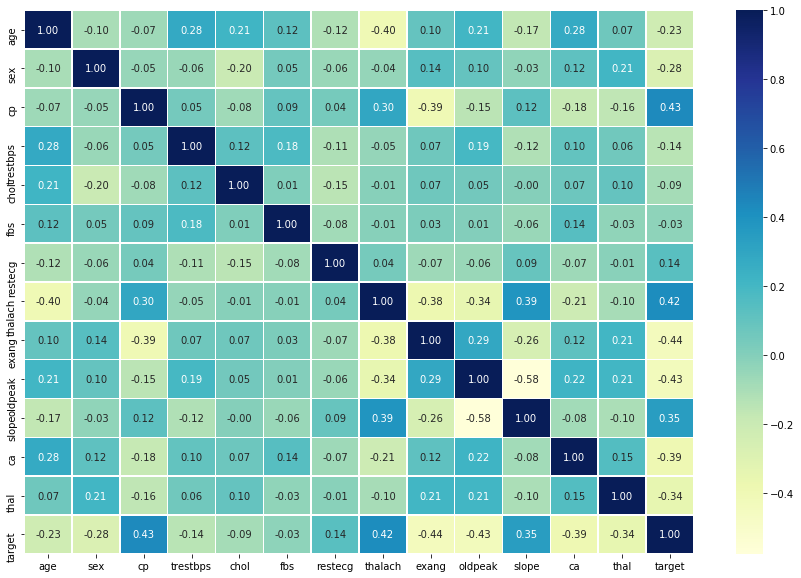

In [82]:
# Better visualize the correlation matrix by the creation of a heatmap
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidths = 0.5,
                 fmt = '.2f',
                 cmap = 'YlGnBu')

# Fix the bug in matplolib update
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

## 5. Modelling

In [83]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [84]:
# Split aata into features and labels
X = df.drop('target', axis = 1)    # features
y = df['target']                   # labels

In [87]:
X.shape, y.shape

((303, 13), (303,))

In [89]:
# Split data into training (80%) and test (20%) data
np.random.seed(42)     # allow for results to be reproduceable

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2)

In [90]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [92]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

Now that the data is split into training and test datasets, now build a Machine Learning Model.

The data will be trained (to find the patterns) on the training dataset.

Then, the model will be tested (using the patterns discovered)on the test data set.

This is a classification problem -- based on health parameters does someone have heart disease or not.
Therefore, the following Machine Learning Models that will be evaluated:
1. Logistic Regression (linear model for classification rather than regression)
2. K-Nearest Neighbors Classifier
3. RandomForestRegressor

In [96]:
# Put models in a dictionary
models = {'Logistic Regression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
           'Random Forest': RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models. 
    models : a dictionary of different Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no lables)
    y_train : training labels
    y_test : test labels
    """
    # Allow results to be reproduceable
    np.random.seed(42)
    
    # Make a dictionary to keep model scores
    model_scores = {}
    
    # Loop through models dictionary
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [97]:
model_scores = fit_and_score(models = models,
                            X_train = X_train,
                            X_test = X_test,
                            y_train = y_train,
                            y_test = y_test)

model_scores

C:\Users\krist\OneDrive\Complete_Machine_Learning_and_Data_Science\Supervised-Learning-Classification\Heart-Disease-Project\env\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison

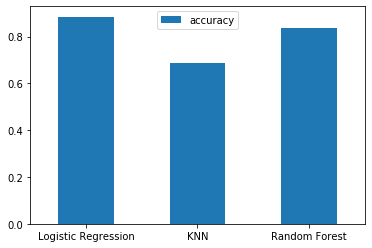

In [101]:
model_compare = pd.DataFrame(model_scores, index = ['accuracy'])    # Note: accuracy is the default for Classification
model_compare.T.plot.bar(rot = 0);

A baseline model has been created. It is understood that the model's first predictions are not always what the next steps should be based on, so one proceeds as follows.

Review the following:
* Hyperparameter Tuning
* Feature Importance
* Confusion Matrix
* Cross-Validation
* Precision
* Recall
* F1 Score
* Classification Report
* ROC Curve
* Area under the Curve (AUC)

### Hyperparameter Tuning (manually)

In [102]:
# Tune KNN

train_scores= []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # Fit the algorithm 
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [103]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [104]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


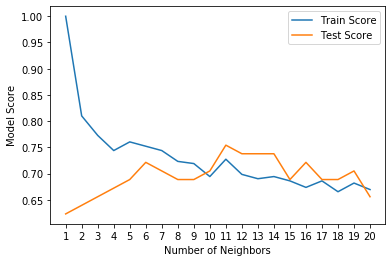

In [108]:
# Best to visualize these results
plt.plot(neighbors, train_scores, label = 'Train Score')
plt.plot(neighbors, test_scores, label = 'Test Score')
plt.xticks(np.arange(1, 21, 1))
plt.xlabel('Number of Neighbors')
plt.ylabel('Model Score')
plt.legend()

print(f'Maximum KNN score on the test data: {max(test_scores) * 100:.2f}%')

Improved the model from 68.9% to 75.4% by tuning the hyperparameters of n_neighbors from 5 (default) to 11, but is still far below the scores from Logistic Regression and Random Forest models. Therefore, will discard of the KNN model out of this experimentation, and focus on the Logistic Regresson and Random Forest models instead.

## Hyperparameters Tuning using RandomizedSearchCV

Will tune the following using RandomizedSeachCV:
* LogisticRegression()
* RandomForestClassifier()

In [115]:
# Create a hyperparameter grid for Logistic Regression
log_reg_grid = {'C': np.logspace(-4, 4, 20),
                'solver': ['liblinear']}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {'n_estimators': np.arange(10, 1000, 50),
           'max_depth': [None, 3, 4, 10],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2)}

Now, hyperparameter grid is setup for each of the models, and will now be tuned using RandomizedSearchCV.

In [111]:
# Tune LogisticRegression

# Allow the results to be reproduceable
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid,
                                cv = 5,
                                n_iter = 20,
                                verbose = True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [112]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [113]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Now the LogisticRegression() has been tuned. Must now do the same for RandomForestClassifier().

In [118]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifiers
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = rf_grid,
                           cv = 5,
                           n_iter = 20,
                           verbose = True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [119]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [120]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.8688524590163934

In [121]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

Tuning the hyperparameter increased the accuracy of the Random Forest model from 83.6% to 86.9%. Next step: try tuning by GridSearchCV. 

Typical flow for tuning hyperparameters...
1. manually 
2. RandomSearchCV
3. GridSearchCV

## Hyperparameters Tuning using GridSearchCV

Because the LogisticRegression model provides the best scores so far, will try to improve them again using GridSearchCV

In [122]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {'C': np.logspace(-4, 4, 30),
                'solver': ['liblinear']}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid = log_reg_grid,
                          cv = 5,
                          verbose = True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.7s finished


In [124]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [125]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [127]:
# Review again the score obtained using RandomSearchCV
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [128]:
# Review again the score obtained from baseline model
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

The Logistic Regression model has done fairly well and constant throughout the experimentation.

## Evaluating the Tuned Machine Learning Classifier beyond accuracy

* ROC cuve and AUC score
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1-score

**Note: use cross validation where possible**

To make comparisons and evaluate the trained model, predictions must be made first.

In [130]:
# Make predicitions with tuned model
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

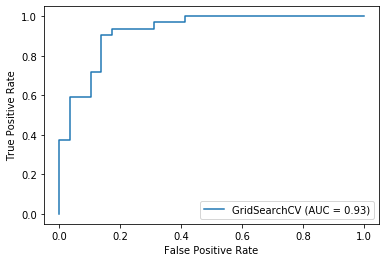

In [132]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test);

In [133]:
# Confusion Matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


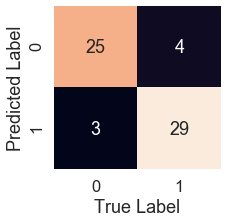

In [134]:
sns.set(font_scale = 1.5)

# Create a function to plot confusion matrix
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot = True,
                     cbar = False)
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    
    # Fix the alignment bug
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds)
    

Now that a ROC curve, an AUC metric, and a confusion matrix are developed, create a classification report with cross-validated pecision, reacall, and f1-score

In [135]:
 print(classification_report(y_test, y_preds))    # Classification Report done on ONLY ONE version of training and test sets

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate Evaluation Metrics Using Cross-Validation

To calculate precision, recall, and f1-score of our model using cross-validation, use `cross_val_score()`.

In [136]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [138]:
# Create a new classifier with best hyperparameters
clf = LogisticRegression(C = 0.20433597178569418, 
                         solver = 'liblinear')

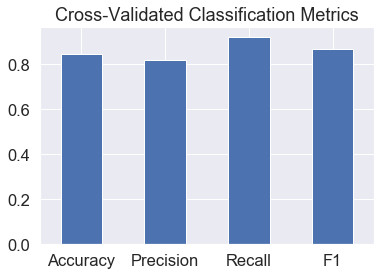

In [162]:
# Visualize Cross-Validated Metrics
cv_metrics = pd.DataFrame({'Accuracy': np.mean(cross_val_score(clf, X, y, cv = 5, scoring = 'accuracy')),
                           'Precision': np.mean(cross_val_score(clf, X, y, cv = 5, scoring = 'precision')),
                           'Recall': np.mean(cross_val_score(clf, X, y, cv = 5, scoring = 'recall')),
                           'F1': np.mean(cross_val_score(clf, X, y, cv = 5, scoring = 'f1'))},
                           index = [0])

cv_metrics.T.plot.bar(title = 'Cross-Validated Classification Metrics',
                      legend = False,
                      rot = 0);

### Feature Importance

Features contributing the most to the outcomes of the model; how these features contribute

Finding feature importance is different for each machine learning model. One way is by searching for "(Name of Model) feature importance" in a Google search.

Now, find the feature importance for the LogisticRegression model

In [163]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C = 0.20433597178569418, 
                         solver = 'liblinear')

clf.fit(X_train, y_train);

In [165]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [164]:
# Check Coefficient
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [166]:
# Match the coefficients of the features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict           # Will evaluate how each feature contributes/correlates to the target

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

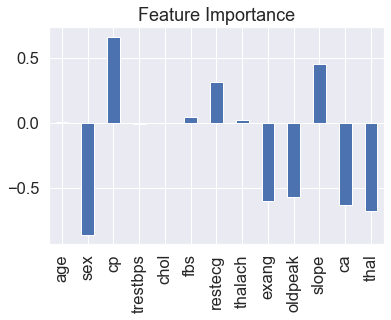

In [179]:
# Visualize Feature Importance
feature_df = pd.DataFrame(feature_dict, index = [0])
feature_df.T.plot.bar(title = 'Feature Importance', legend = False);

In [180]:
# Compare coefficient of sex feature to target by crosstab()
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


In [181]:
pd.crosstab(df.slope, df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## 6. Experimentation

The evaluation metric criteria was for 95%, but only achieved 85%. 

Further experimentation:
* Collect more data
* Improve the current model
* Try a better model (CatBoost or XGBoost)
* If the model meets the evaluation metric criteria, determine how to export it and share it with others.